# Эмпирические аппроксимации для вероятности разорения в классическом процессе риска


## Введение

Целью данной работы является оценка вероятность разорения страховой компании, основываясь на наблюдаемых данных: имеющемся капитале, страховых взносах и выплатах. Термин "разорение" означает в данном контексте не буквальное разорение, а событие, заключающееся в том, что страховые выплаты в определеннный момент времени превышают имеющийся капитал компании в начальный момент времени и полученные после страховые взносы. Возможность вычисления этой вероятности позволяет выбрать страховой компании такие цены взносов, при которой вероятность разорения будет находится в пределах допустимого, но при этом цена премии не будет слишком высока.

Для нахождения вероятности будет использоваться эмпирическая аппроксимация в рамках модели классического процесса риска. Есть две формулы аппроксимации: Де Вилдера и Беекмана-Бауэрса. Чтобы их использовать, нужно будет узнать, по какому закону и с какими параметрами распределены страховые выплаты. Поэтому будут выдвигаться гипотезы о распределении страховых выплат. Эти гипотезы будут проходить проверку с помощью критерия согласия хи-квадрат. В качестве альтернативного решения будут использована точечная оценка аппроксимации Де Вилдера.

Эта работа разделена на пять частей: теоретическую справку, где будут объяснен классический процесс риска и критерий согласия хи-квадрат Фишера; проверку работоспособности критерия хи-квадрат в Python при помощи генерации случайных выборок из разных распределений; предварительный анализ данных, на основе которых будет вычислены вероятности разорения; вычисление вероятности разорения тремя способами; заключение.

Большая часть информации, на которой основывается эта работа, взята из [1]. Все вычисления и визуализации выполнены на языке Python 3 в IDE Jupyter Notebook. 

Работа состоит из введения, двух глав, заключения, списка использованных ресурсов, содержащего 4 наименования, и приложений. Объем - 15 страниц (22 страницы, включая приложения).

## Теоретическая часть

### Классический процесс риска



Пусть$\newcommand{\ld}{\lambda} \newcommand{\al}{\alpha}$ $\varsigma_i$ - страховой взнос с $i$-ого клиента, $N_+(t)$ - количество заключенных контрактов за время $[0; t]$. Тогда доход страховой компании за период $[0; t]$ считается так:

$$R_+(t) = \sum_{i = 1}^{N_+(t)}\varsigma_i.$$

Пусть $X_i$ - размер страховой выплаты в момент времени $T_i$ ($i \geq 1; 0 \leq T_1 \leq T_2 \leq ... \leq t$ ); $N_-(t)$ - количество страховых выплат за период $[0; t]$. Следовательно, итоговый убыток страховой компании $R_-(t)$ за время $[0; t]$ равен:

$$R_-(t)= \sum_{i = 1}^{N_-(t)}X_i. $$

Тогда прибыль $R_d(t)$ равна:

$$R_d(t) = R_+(t) - R_-(t) = \sum_{i = 1}^{N_+(t)}\varsigma_i - \sum_{i = 1}^{N_-(t)}X_i.$$

Пусть $u$ - начальный капитал (имеется в виду суммарный капитал в начальный момент времени) страховой компании. Процесс $R(t) = u + R_d(t)$ называется процессом риска

Пусть $\tau = \inf\{t: R(t) + u < 0\}$ - момент разорения. Тогда вероятность разорения на бесконечном промежутке времени при начальном капитале $u$ определяется так:

$$\psi(u) = P(\tau < \infty | R(0) = u),$$

вероятность разорения на конечном промежутке времени $[0; t]$ ($t > 0$) при начальном капитале $u$:

$$\psi(t, u) = P(\tau \leq t | R(0) = u).$$

В данной работе будет считаться вероятность разорения на бесконечном промежутке времени.

Можно определить вероятность неразорения:

$$\phi(u) = \begin{cases} 1 - \psi(u), \ u \geq 0 \\ 0, \ u \leq 0\end{cases}$$

Для упрощения модели будет предполагаться, что случайные величины $\varsigma_i, \ i = 1, 2, ...$ попарно независимы, независимы от процесса $N_+(t)$, имеют одинаковое распределение, и пусть существует $b = E(\varsigma_1).$ Пусть процесс $N_+(t)$ является пуассоновским с интенсивностью $\lambda_+$, тогда:

$$E(R_+(t)) = b\lambda_+t, \ t \geq 0.$$

Пусть стандартное отклонение случайной величины $\varsigma_i$ невелико, тогда случайный процесс $R_+(t)$ (доход страховой компании) приближенно равен своему математическому ожиданию:

$$R_+(t) \approx ct \ \ \ (c = b\lambda_+).$$

Пусть $X_i, i = 1, 2, ...$ попарно независимы, независимы от процесса $N_(t)$ и имеют одинаковую функцию распределения $F(x)$, процесс $N_-(t))$ является процессом восстановления, т.е. случайные величины $\theta_i = T_i - T_{i - 1} (i \geq 1)$ независимы и одинаково распределены. Также предположим, что $E(X_1) = \mu < \infty$ и $E(\theta_1) = \alpha < \infty.$

Введя все эти предположения, получаем модель, именуемую процессом риска Спарре Андерсена:

$$R(t) = u + ct - \sum_{k = 1}^{N(t)}X_k, \ t \geq 0,$$

где $c > 0, N(t)$ - процесс восстановления, $X_1, X_2, ...$ - попарно независимые случайные величины с одинаковой функцией распределения $F(x)$ (причем $F(0) = 0$) и независимые от процесса $N(t)$

Нагрузка (или коэффициент) безопасности $\rho$, показывающая "удельный" доход страховой компании в единицу времени:

$$\rho = \frac{c\alpha - \mu}{\mu} = \frac{c\alpha}{\mu} - 1.$$

Классический процесс риска - это процесс риска Спарре Андерсена, в котором процесс $N(t)$ - пуассоновский процесс с интенсивностью $\lambda > 0.$

В классическом процессе риска нагрузка безопасности приобретает вид:

$$\rho = \frac{c - \lambda\mu}{\lambda\mu} = \frac{c}{\lambda\mu} - 1.$$

В этой модели $E(R(t)) = u + (c - \frac{\mu}{\alpha})t$. Следовательно, при $c\alpha < \mu E(R(t))$ будет линейно убывать со временем, и вероятность разорения будет равна 1.

### Эмпирические аппроксимации вероятности разорения
#### Аппроксимация Де Вилдера

Идея этой аппроксимации в том, что берется формула, справедливая для классического процесса риска $R^*(t)$ с экспоненциально распределенными выплатами с интенсивностью $\lambda^*$ (т.е.  $E(X^*_i - X^*_{i - 1}) = \frac{1}{\ld^*}$), математическим ожиданием выплат $\mu^*$, нагрузкой безопасности $\rho^*$:

$$\psi(u) = \frac{1}{1 + \rho^*}\exp\Bigg \{-\frac{\rho^*u}{\mu^*(1 + \rho^*)}\Bigg \},$$

и первые три начальных момента $R^*(t)$ приравниваются к начальным моментам $R(t)$, где $R(t)$ - процесс риска Спарре Андерсена с соответствующими параметрами $\ld, \mu, \rho$:

$$E[(R^*(t))^n] = E[(R(t))^n], \ \ \ n = 1, 2, 3.$$

Отсюда получаются равенства:

$$\mu^* = \frac{\mu_3}{3\mu_2}, \ \rho^* = \frac{2\rho\mu\mu_3}{3\mu_2^2}, \ \ld^* = \frac{9\ld\mu_2^3}{2\mu_3^2},$$

где $\mu_i - i$-ый начальный момент $X_1$

Аппроксимацию Де Вилдера:

$$\psi(u) \approx \psi_{DV}(u) = \frac{1}{1 + \rho^*}\exp\Bigg \{-\frac{\rho^*u}{\mu^*(1 + \rho^*)}\Bigg \}.$$


В качестве статистических оценок (найденных методом максимального правдоподобия) используются:

$$\hat{\ld} = \frac{N(t)}{t}; \ \hat{\mu} = \overline{X}; \ \hat{\rho} = \frac{ct}{N(t)\overline{X}} - 1,$$

однако при их использовании получается не оценка вероятности разорения, а оценка ее аппроксимации, поэтому говорить о несмещенности и состоятельности этих оценок относительно самой вероятности не приходится.  

#### Аппроксимация Беекмана-Бауэрса

Для этой аппроксимации используется формула Поллачека-Хинчина-Беекмана для вероятности разорения в классическом процессе риска:

$$\psi(u) = P(Y_1 + ... + Y_M > u) = 1 - \frac{\rho}{1 + \rho}\sum_{n = 0}^{\infty}\frac{H^{*n}(u)}{(1 + \rho)^n},$$

где $Y_1, Y_2, ...$ - независимые случайные величины с одинаковой плотностью $h(x) = \frac{1}{\mu}(1 - F(x)) \ (x > 0);  H(X)$ - соответственно, их функция распределения; $M$ - независимая от $Y_1, Y_2, ...$ случайная величина с геометрическим распределением, имеющим параметр $p = \frac{1}{1 + \rho}.$

С помощью этой формулы выводится тождество (справедливое при $c > \ld\mu, \ c = E(\varsigma_1)\ld$):

$$\psi(u) = \frac{1 - B(u)}{1 + \rho},$$

$B(u) = P\big(\inf_{t \geq 0}R(t) < -u\big|\inf_{t \geq 0}R(t) < 0\big).$

Суть аппроксимации состоит в замене $B(u)$ функцией $G_{\al,\gamma}(u)$, при условии, что первые их два начальные момента равны. В итоге, имеем:

$$\psi(u) \approx \psi_{B \ B}(u) = \frac{1 - G_{\al,\gamma}(u)}{1 + \rho},$$

где $\al = \frac{\mu_B^2}{\sigma_B^2}, \ \gamma = \frac{\mu_B}{\sigma_B^2}, \ \mu_B = \frac{\mu_2(1 + \rho)}{2\rho\mu}, \sigma^2_B = \frac{\mu_2(1 + \rho)}{2\rho\mu}\bigg (\frac{2\mu_3}{3\mu_2} + \frac{\mu_2(1 - \rho)}{2\rho\mu}\bigg ), \ G_{\al,\gamma}(u)$ - функция гамма-распределения:


### Критерий согласия хи-квадрат Фишера

Критерии проверки гипотезы о возможном виде закона распределения случайной величины называют критериями согласия. Основной гипотезой $H_0$ является: $F(x) = F_0(x, \theta_1, ..., \theta_r),$ где $F(x)$ - неизвестный закон распределения случайной величины $X$, $F_0(x)$ - предполагаемый закон распределения с неизвестными параметрами $\theta_i, \ i = \overline{1, r}$. Альтернативная гипотеза явным образом не выдвигается. 

Пусть $X_1, ..., X_n$ - независимая однородная выборка из генеральной совокупности с неизвестным распределением $F(x) = P(X_1 < x),$ предполагаемое распределение имеет вид $F_0(x, \theta_1, ..., \theta_r) = F_0(x, \theta)$. Пусть имеются $a$ и $b$: $a < X_{(1)}, b > X_{(n)}$, где $X_{(1)}, X_{(n)}$ - члены вариационного ряда. Разделим интервал $[a, b]$ на k равных непересекающихся частей (k - произвольное число). Пусть $\nu_j$ - количество элементов выборки, попавших в $j$-ий интервал. Определим числа $p^{0}_j$: $p^{0}_j = F_0(j\delta, \theta) - F_0((j - 1)\delta, \theta), \ j = \overline{1, k}, \ \delta = \frac{b - a}{k}; \ \theta \ $  нужно, конечно же, оценить (т.е. $p^{0}_j$ - это вероятность попадания случайно взятого элемента генеральной совокупности при условии, что $F(x) = F_0(x, \theta)$).

Статистикой критерия хи-квадрат является величина:

$$X^2 = \sum^k_{j = 1}\frac{(\nu_j - np^{0}_j)^2}{np^{0}_j}$$

Эта статистика показывает общее отклонение реальных данных от теоретических, поэтому чем она больше, тем меньше модель согласуется с реальностью. По теореме Пирсона, $X^2$ асимптотически стремится к $\chi^2(k - r - 1)$.
Возьмем малое число $\al$, большее 0. Тогда можно определить критическую область K:

$$K = \{X^2 > \chi^2_{k - r - 1}(\al)\},$$

где $\ \chi^2_{k - r - 1}(\al)$ - процентная точка уровня $\al$ распределения хи-квадрат с $k - r - 1$ степенями свободы.
Если $X^2 \in K$, то $H_0$ отвергается. При этом вероятность ошибки первого рода равна $\al$ (однако это справедливо лишь при бесконечно большом объеме выборки, точность этой ошибки в реальных выборках неизвестна).

## Практическая часть

### Проверка работоспособности критерия хи-квадрат в Python
Имеется код, взятый из [4] и модифицированный мною (использована другая функция критерия согласия, с поправкой Йетса, добавлена вероятность ошибки).

Алгоритм: предполагаем, что выборка распределена по определенному закону, оцениваем параметры методом максимального правдоподобия, вычисляем значение статистики критерия $X^2$. Делаем так для всех имеющихся у нас законов распределения, и выбираем тот, у которого наименьшее значение статистики. 

Используются непрерывные распределения, наиболее часто употребляемые в качестве распределения размера страховой выплаты: равномерное, гамма, экспоненциальное, логнормальное, Вейбулла, хи, Рэлея.

Сгенерируем выборки разных распределений с помощью модуля numpy.random (примечание относительно другой библиотеки, отвечающей за законы распределения scipy.stats: при выводе параметров распределения в некоторых случаях будут выводиться два дополнительных параметра - они обозначают loc (положение) и scale (масштаб): $f(x, loc, scale) = \frac{f(\frac{x-loc}{scale})}{scale}$, где $f$ - плотность распределения), и посмотрим, как программа определяет распределения. 

Стоит при этом учитывать, что некоторые законы распределения являются частными случаями других законов (экспоненциальное и хи-квадрат распределения являются частными случаями гамма распределения), так что если мы генерируем, например, выборку из экспоненциального распределения, и в ответ получаем гамма распределение, то это не противоречит логике.

Выборка из равномерного распределения объема 1000 с параметрами $[5, 20]$ дает равномерное распределение с параметрами $[5, 15]$, что довольно близко к реальности. Выборка из гамма-распределения с параметром формы 5 объема 10000 дает правильный результат с различиями, не превышающими один знак после запятой. Единственное, что вызывает недоверие, так как это нормальная выборка, которая дает гамма-распределение. Посмотрим, как выглядят плотности этих двух распределений:

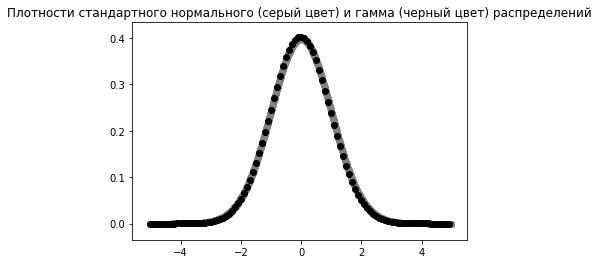

In [7]:
#у вектора x2 шаг меньше, чтобы были видны различия между графиками
x1 = np.arange(-5, 5, 0.01) 
x2 = np.arange(-5, 5, 0.1) 
y1 = st.norm.pdf(x1) #плотности распределений
y2 = st.gamma.pdf(x2, 36632.30650075304, -189.21656328027439, 0.00516493776007497)
plt.scatter(x1, y1, color='gray') 
plt.scatter(x2, y2, color='black')
plt.title('Плотности стандартного нормального (серый цвет) и гамма (черный цвет) распределений');

Теперь правильность программы не вызывает сомнений.

Ниже представлены результаты в виде таблицы, где заголовок показывает, из какого распределения и с какими параметрами сгенерирована выборка, а в самой таблице результаты работы программы.

In [18]:
sample1 = np.random.uniform(5, 20, 1000)
dist, c, params, dist_results, a, t = best_dist(sample1)
t.columns = ['Распределение: равномерное, 5, 20']
t

,"Распределение: равномерное, 5, 20"
Best fitting distribution:,uniform
Best c value:,5.0453735581151
Best p value:,0.88812646680803
Parameters for the best fit:,"(5.019437776251886, 14.97837887335677)"
Type I error:,0.16966487769969


In [19]:
sample2 = np.random.normal(size = 10000)
dist, c, params, dist_results, a, t = best_dist(sample2)
t.columns = ['Распределение: нормальное, 0, 1']
t

,"Распределение: нормальное, 0, 1"
Best fitting distribution:,gamma
Best c value:,28.458863110099
Best p value:,0.99997735190956
Parameters for the best fit:,"(36632.30650075304, -189.21656328027439, 0.00516493776007497)"
Type I error:,3.4716722463026e-05


In [20]:
sample4 = np.random.gamma(5, size = 10000)
dist, c, params, dist_results, a, t = best_dist(sample4)
t.columns = ['Распределение: гамма, 5']
t

,"Распределение: гамма, 5"
Best fitting distribution:,gamma
Best c value:,27.97418820701
Best p value:,0.99994104416364
Parameters for the best fit:,"(5.156357380053214, -0.02483490363486638, 0.9818222582614679)"
Type I error:,8.9125037480197e-05


### Предварительный анализ данных 

Для оценки вероятности разорения используются реальные данные о страховых взносах и выплатах компании AIICO INSURANCE [3]. Данные показывают, в какие дни были произведены взносы и выплаты и в каком количестве. Будем считать, что суммарная выплата за $i$-ый день является $i$-ым взносом. Данные о премиях агрегированы ежегодно.

In [49]:
t_claims

,Дата,"Суммарная выплата, млрд найр"
0,13/01/2013,0.40740672629968
1,17/01/2013,0.37808702025706
2,17/01/2013,0.44022941118532
3,28/01/2013,0.37846322639732
4,08/02/2013,0.49161161887138
5,12/02/2013,0.47385809130551
6,14/03/2013,0.55588639937984
...,...,...
114,25/08/2018,1.09915741653977
115,23/09/2018,1.10094835455484


In [50]:
t_premium

,Год,"Суммарное кол-во взносов, млрд найр"
0,2013,23.3160
1,2014,20.9279
2,2015,10.4107
3,2016,30.0293
4,2017,32.0977
5,2018,37.0469


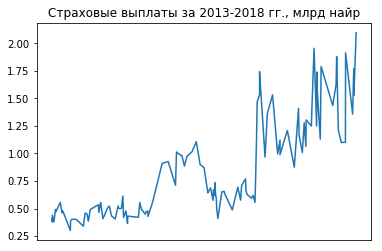

In [51]:
plt.plot(dates_n1, t_claims.iloc[:,1])
plt.title('Страховые выплаты за 2013-2018 гг., млрд найр')
plt.tick_params(axis = 'x',
               which = 'both',
               bottom = False,
               labelbottom = False);

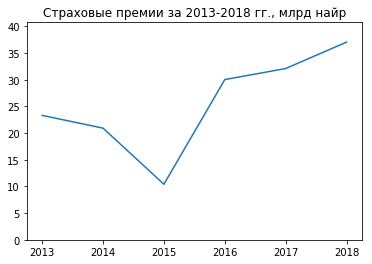

In [52]:

plt.plot(t_premium.iloc[:,0], t_premium.iloc[:,1])
plt.title('Страховые премии за 2013-2018 гг., млрд найр')
plt.ticklabel_format(style='plain');
plt.ylim(0, t_premium.iloc[:,1].max()*1.1);

### Вычисление вероятности разорения

Мы получим вероятность разорения компании тремя способами:

1)по оценке аппроксимации Де Вилдера (без проверки гипотезы о виде распределения размера страховых выплат);

2)по формуле аппроксимации Де Вилдера;

3)по формуле аппроксимации Беекмана-Бауэрса.

Для первого способа нам нужно посчитать: $\hat{\ld} = \frac{N(t)}{t}; \ \hat{\mu} = \overline{X}; \ \hat{\rho} = \frac{\overline{\varsigma_1}\ld_+t}{N(t)\overline{X}} - 1,$ где $N(t)$ - количество страховых выплат за $t$ дней, $\overline{X}$ - выборочное среднее размера выплат, $\overline{\varsigma_1}$ - выборочное среднее размера страхового взноса от одного клиента, $\ld_+$ - интенсивность страховых взносов клиентами.

Во втором способе нужно принять одну из гипотез о виде распределения размера страховых выплат, и отсюда найти $\mu^* = \frac{\mu_3}{3\mu_2}, \ \rho^* = \frac{2\rho\mu\mu_3}{3\mu_2^2}, \ \ld^* = \frac{9\hat{\ld}\mu_2^3}{2\mu_3^2},$ (где $\mu_i$ - первые три начальных момента, $\rho = \frac{\overline{\varsigma_1}\ld_+}{\hat{\ld}\mu} - 1$).

В третьем способе нужно использовать уже полученные данные для вычисления $\al = \frac{\mu_B^2}{\sigma_B^2}, \ \gamma = \frac{\mu_B}{\sigma_B^2} \ \Bigg( где \ \mu_B = \frac{\mu_2(1 + \rho)}{2\rho\mu}, \ \sigma^2_B = \frac{\mu_2(1 + \rho)}{2\rho\mu}\bigg (\frac{2\mu_3}{3\mu_2} + \frac{\mu_2(1 - \rho)}{2\rho\mu}\bigg)\Bigg)$ .

Для имеющихся реальных данных получаем вероятности 3.54e-7, 4.80e-10 и 3.18e-10 по трем способам соответственно. Это поднимает вопрос о том, что возможно понижение цены премии (если это может привлечь новых клиентов) или принятие иных решений, которые несут некоторый риск, но обещают прибыль в долгосрочной перспективе.

## Заключение 

Полученные аппроксимации (и оценка аппроксимации) показывают, что вероятность разорения компании AIICO в условиях нашей модели на бесконечном временном промежутке почти равна нулю. Однако нужно понимать, что это лишь аппроксимации в рамках модели, которая не полностью соответствует реальности, так как процесс поступления взносов является линейным и модель рассматривает лишь поступления взносов и выплат из-за контекста термина "разорение" - она не учитывает налоги, выплачиваемые компанией, другие источники денежных средств, например, рынка ценных бумаг, и множество других факторов. Поэтому для анализа страховых компаний в разрезе риска требуются более детальные модели.

Итоги курсовой работы: был проверен алгоритм проверки гипотез о законе распределения выборки, с помощью этого алгоритма подобран закон распределения для выборки страховых выплат компании AIICO; успешно найдены три вероятности разорения: по оценке аппроксимации Де Вилдера, по аппроксимации Де Вилдера и по аппроксимации Беекмана–Бауэрса. 

## Cписок использованных источников
[1] В.Ю. Королев, В.Е. Бенинг, Шоргин С.Я. Шоргин Математические основы теории риска М.: Физматлит, 2011. - 591 с. - ISBN 978-5-9221-1267-3.

[2] https://www.statisticshowto.datasciencecentral.com/what-is-the-yates-correction/

[3] https://www.aiicoplc.com/index.php/about-us-aiico/investor-relations/financial-report

[4] https://stackoverflow.com/questions/51894150/python-chi-square-goodness-of-fit-test-to-get-the-best-distribution

## Приложения

In [13]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy.stats as st
import pandas as pd
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.precision", 14)
import sympy as sp
from IPython.display import display, Math, Markdown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
ip = get_ipython() 
ibe = ip.configurables[-1] 
ibe.figure_formats = { 'pdf', 'png'}
def _repr_latex_(self): 
    return r'\begin{center}\scalebox{0.7}{%s}\end{center}' % self.to_latex() 
pd.set_option('display.notebook_repr_html', True) 
pd.DataFrame._repr_latex_ = _repr_latex_

In [9]:
# Реализация критерия согласия хи-квадрат 
def best_dist(data):
# распределения, наиболее часто употребляемые в качестве распределения размера страховой выплаты:
    dist_names = ['uniform', 'gamma', 'expon', 'lognorm', 'weibull_min', 'chi', 'rayleigh']
    
    from math import isnan
    from sys import maxsize
    
    # разбиваем область определения выборки на k равных интервалов (k определяется либо правилом Стерджеса, либо Фридмана Диакониса (выбирается то, что дает большее k))
    histo, bin_edges = np.histogram(data, bins='auto')
    number_of_bins = len(bin_edges) - 1
    observed_values = histo
    
    # подбираем самые близкие параметры распределений к выборке. params примет вид {'имя распределения':функция распределения с подобранными параметрами}
    params = {}
    
    for dist_name in dist_names:
        try:
            dist = getattr(st, dist_name)   # ~ dist = st.имя_распределения 
            param = dist.fit(data)       #подбираем параметры методом максимального правдоподобия
            params[dist_name] = param
        except Exception:
            print("Error occurred in fitting")
            params[dist_name] = "Error"

    dist_results = []
    
    for dist_name in dist_names:

        param = params[dist_name]
        if (param != "Error"):
            # Applying the SSE test
            arg = param[:-2]
            loc = param[-2]
            scale = param[-1]
            # значения функции распределения (cdf) и разницы между соседними значениями cdf, умноженные на объем выборки (expected_values)
            cdf = getattr(st, dist_name).cdf(bin_edges, loc=loc, scale=scale, *arg)
            expected_values = len(data) * np.diff(cdf)
            np.place(expected_values, expected_values==0, 10**-10)
            # объединяем два массива в один для использования функции chi2_contingency
            exp_obs_values = np.array((observed_values, expected_values))
            # c - значение статистики критерия, p - p-value
            c , p, *_ = st.chi2_contingency(exp_obs_values)
            dist_results.append([dist_name, c, p])
            
    # select the best fitted distribution
    best_dist, best_c, best_p= None, maxsize, 0

    for item in dist_results:
        name = item[0]
        c = item[1]
        p = item[2]
        if (not isnan(c)):
            if (c < best_c):
                best_c = c
                best_dist = name
                best_p = p
    best_a = st.chi2.cdf(best_c, number_of_bins - len(param)) #len(param) - количество неизвестных параметров
    
    # table - результаты в виде таблицы
    t_index = ["Best fitting distribution:", "Best c value:", "Best p value:", "Parameters for the best fit:", "Type I error:"]
    table = pd.DataFrame([best_dist, best_c, best_p, params[best_dist], best_a], columns = [''], index = t_index)
    
    return best_dist, best_c, params[best_dist], dist_results, best_a, table

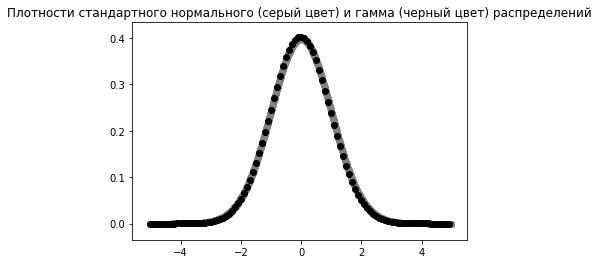

In [7]:
#у вектора x2 шаг меньше, чтобы были видны различия между графиками
x1 = np.arange(-5, 5, 0.01) 
x2 = np.arange(-5, 5, 0.1) 
y1 = st.norm.pdf(x1) #плотности распределений
y2 = st.gamma.pdf(x2, 36632.30650075304, -189.21656328027439, 0.00516493776007497)
plt.scatter(x1, y1, color='gray') 
plt.scatter(x2, y2, color='black')
plt.title('Плотности стандартного нормального (серый цвет) и гамма (черный цвет) распределений');

In [18]:
sample1 = np.random.uniform(5, 20, 1000)
dist, c, params, dist_results, a, t = best_dist(sample1)
t.columns = ['Распределение: равномерное, 5, 20']
t

,"Распределение: равномерное, 5, 20"
Best fitting distribution:,uniform
Best c value:,5.0453735581151
Best p value:,0.88812646680803
Parameters for the best fit:,"(5.019437776251886, 14.97837887335677)"
Type I error:,0.16966487769969


In [19]:
sample2 = np.random.normal(size = 10000)
dist, c, params, dist_results, a, t = best_dist(sample2)
t.columns = ['Распределение: нормальное, 0, 1']
t

,"Распределение: нормальное, 0, 1"
Best fitting distribution:,gamma
Best c value:,28.458863110099
Best p value:,0.99997735190956
Parameters for the best fit:,"(36632.30650075304, -189.21656328027439, 0.00516493776007497)"
Type I error:,3.4716722463026e-05


In [20]:
sample4 = np.random.gamma(5, size = 10000)
dist, c, params, dist_results, a, t = best_dist(sample4)
t.columns = ['Распределение: гамма, 5']
t

,"Распределение: гамма, 5"
Best fitting distribution:,gamma
Best c value:,27.97418820701
Best p value:,0.99994104416364
Parameters for the best fit:,"(5.156357380053214, -0.02483490363486638, 0.9818222582614679)"
Type I error:,8.9125037480197e-05


In [2]:
# предварительный анализ данных
from datetime import date, datetime, timedelta

t_claims = pd.read_csv('Claims data.csv') # считываем csv файлы
t_premium = pd.read_csv('Premiums data.csv')

dates_d1 = [datetime.strptime(i,'%d/%m/%Y') for i in t_claims.iloc[:,0]] # даты выплат в формате datetime
dates_n1 = pd.Series([int((i - dates_d1[0]).days) for i in dates_d1]) # дни как количество 
dates_n2 = pd.Series([i*365 for i in range(6)])

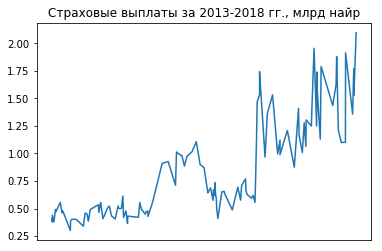

In [51]:
plt.plot(dates_n1, t_claims.iloc[:,1])
plt.title('Страховые выплаты за 2013-2018 гг., млрд найр')
plt.tick_params(axis = 'x',
               which = 'both',
               bottom = False,
               labelbottom = False);

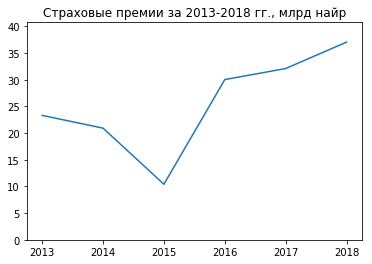

In [52]:

plt.plot(t_premium.iloc[:,0], t_premium.iloc[:,1])
plt.title('Страховые премии за 2013-2018 гг., млрд найр')
plt.ticklabel_format(style='plain');
plt.ylim(0, t_premium.iloc[:,1].max()*1.1);

In [4]:
# Вычисления вероятности риска
# 1-ый способ
sg_ = 9342.5/10**9 # выборочное среднее размера страхового взноса от одного клиента 
u = 35.054680 # начальный капитал
t = 365*5 # количество дней
N = len(t_claims.iloc[:,1]) # количество страховых выплат
X_ = t_claims.iloc[:,1].mean() # выборочное среднее размера выплат
ld_plus = t_premium.iloc[:,1].sum()/sg_/t # интенсивность страховых взносов клиентами
ld1 = N/t # оценка интенсивности выплат процесса R*(t)
mu1 = X_ # оценка начального момента процесса R*(t)
rho1 = sg_*ld_plus*t/(N*X_) - 1 # нагрузка безопасности
psi1 = (1 + rho1)**-1*sp.exp(-rho1*u/(mu1*(1 + rho1)))
psi1

3.54746330616640e-7

In [10]:
# 2-ой способ
dist, c, params, dist_results, a, table = best_dist(t_claims.iloc[:,1]) # выбираем гипотезу о виде распределения страховых выплат
mu2 = [getattr(st, dist).moment(n, *params) for n in range(1,4)]  # начальные моменты порядка 1,2,3
ld2 = N/t
rho2 = sg_*ld_plus/(ld2*mu2[0]) - 1
# параметры процесса R*(t):
mu2_a = mu2[2]/(3*mu2[1]) 
rho2_a = 2*rho2*mu2[0]*mu2[2]/(3*mu2[1]**2)
ld2_a = 9*ld2*mu2[1]**3/(2*mu2[2]**2)
psi2 = (1 + rho2_a)**-1*sp.exp(-rho2_a*u/(mu2_a*(1 + rho2_a)))
psi2

4.80136157717899e-10

In [55]:
# 3-ий способ
mu3, rho3, ld3 = mu2, rho2, ld2
mu_B = mu3[1]*(1 + rho3)/(2*rho3*mu3[0])
sg_B = mu_B*(2*mu3[2]/(3*mu3[1]) + mu3[1]*(1 - rho3)/(2*rho3*mu3[0]))
al = mu_B**2/sg_B
g = mu_B/sg_B
psi3 = (1 - st.gamma.cdf(u,al,scale=1/g))/(1 + rho3)
psi3

3.1828243267664725e-10